# Задание 1 (1 балл)

Если разбить поисковые запросы пользователей в РФ по тематикам, то можно выделить несколько кластеров, запросы в которых имеют похожий смысл или тему. В файле `searches.csv` - 6 временных рядов, соответствующих кластерам: 

    1. Коронавирус
    2. Отели за границей
    3. Школьные задания
    4. Подарки и поздравления
    5. Спортивные события
    6. Музыка

Определите, какой временной ряд относится к какому кластеру.

Дайте ответ для всех кластеров в формате "кластерX - `<название>`, потому что ... (ваши наблюдения и выводы на основе временного ряда)".

Ответы без обоснования не будут приняты.


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  
from prophet import Prophet

searches_df = pd.read_csv('searches.csv', parse_dates=['ds'])
searches_df.head()

,ds,кластер1,кластер2,кластер3,кластер4,кластер5,кластер6
0,2019-01-01,299036,1493286,11268577,50492,18596,599268
1,2019-01-02,228190,818971,8629779,57169,25282,952299
2,2019-01-03,297875,734393,7828308,61336,25863,1176552
3,2019-01-04,211296,742071,7542338,64927,27730,1304149
4,2019-01-05,270611,828797,7618576,62939,27709,1419539


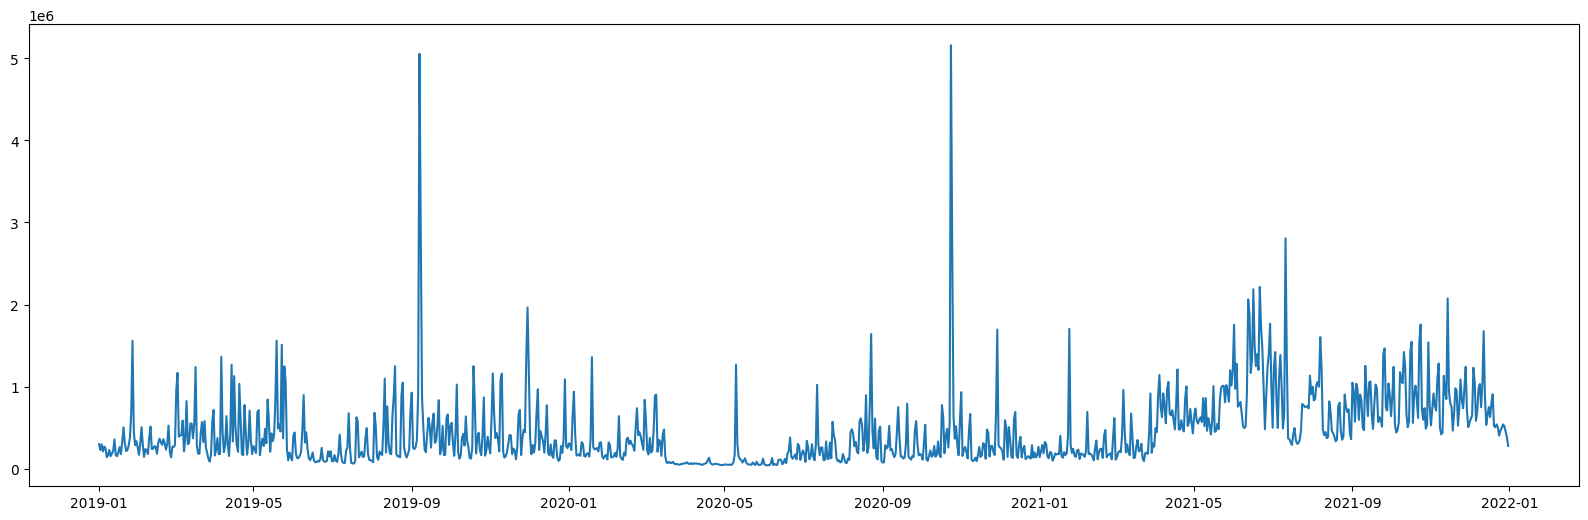

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер1']);

In [3]:
# узнаем конкретные даты пиков и поймем, что в них происходило
searches_df[['ds', 'кластер1']].sort_values(by=['кластер1'], ascending=False)[:10]

,ds,кластер1
662,2020-10-24,5157766
249,2019-09-07,5053926
250,2019-09-08,2853738
922,2021-07-11,2806375
663,2020-10-25,2661991
902,2021-06-21,2214709
897,2021-06-16,2185944
1048,2021-11-14,2073885
893,2021-06-12,2063175
333,2019-11-30,1963938


In [4]:
# 24 октября 2020 - Нурмагомедов победил Гэтжи
# 7 сентября 2019 - Нурмагомедов победил Порье и защитил титул чемпиона UFC
# 11 июля 2021 - Макгрегор проиграл Порье, сломав ногу в первом раунде
# 21 июня 2021 - Россия проиграла Дании и выбыла из Евро-2020
# Таким образом делаем вывод что этот временной ряд отражает запросы по спортивным событиям. К тому же видим сильное затишье в начале ковида

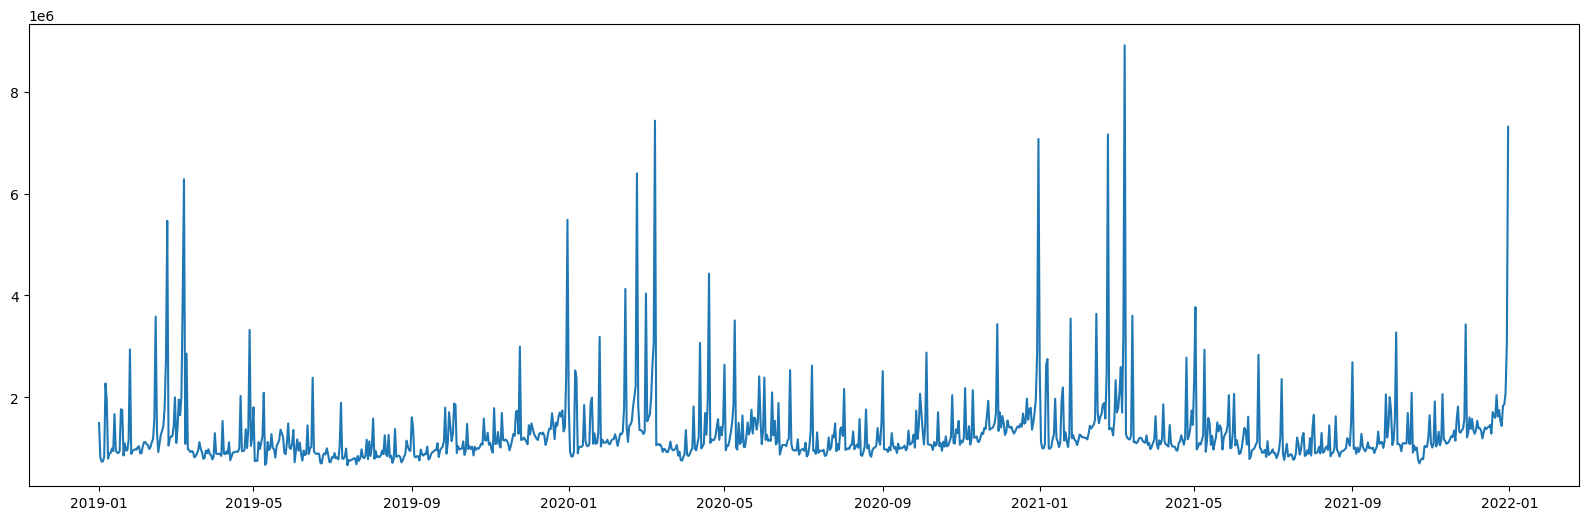

In [5]:
plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер2']);

In [6]:
searches_df[['ds', 'кластер2']].sort_values(by=['кластер2'], ascending=False)[:15]
# пики в праздники: 8 марта, Новый Год, 23 февраля, 14 февраля - так что тут подарки и поздравления

,ds,кластер2
797,2021-03-08,8914710
432,2020-03-08,7433728
1095,2021-12-31,7312589
784,2021-02-23,7163058
730,2020-12-31,7074890
418,2020-02-23,6397137
66,2019-03-08,6284878
364,2019-12-31,5486382
53,2019-02-23,5466937
474,2020-04-19,4428081


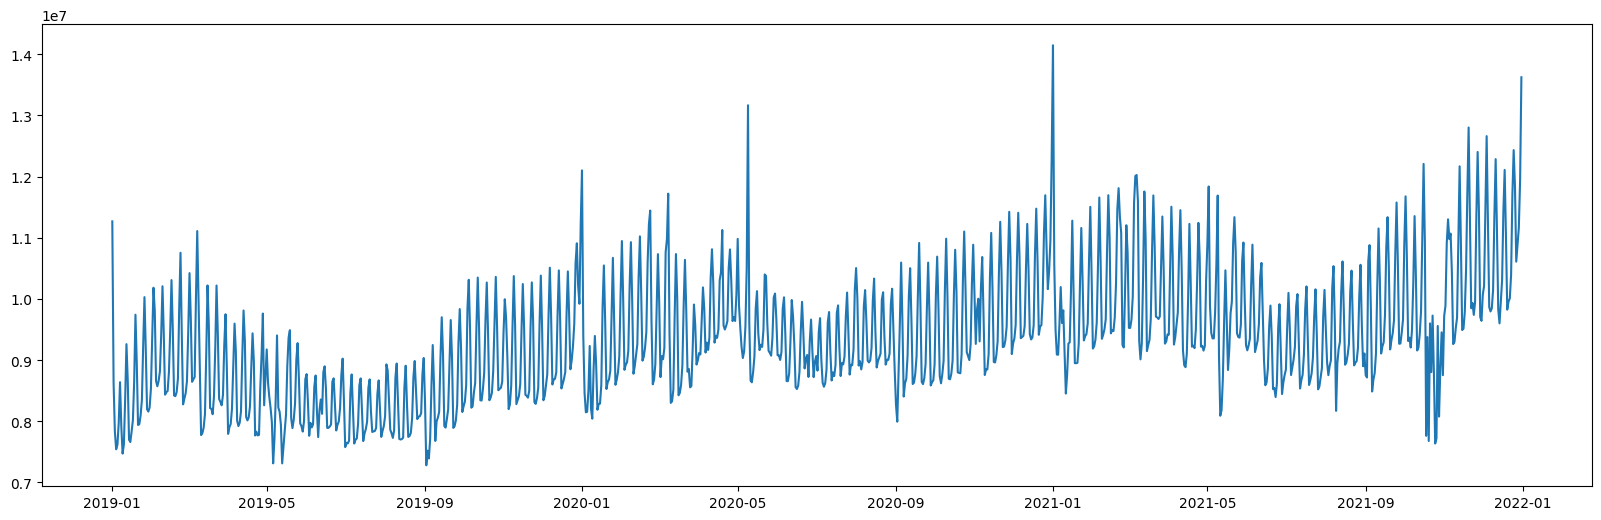

In [7]:
plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер3']);
# Запросы есть каждый день, тем не менее наблюдается сезонность со снижением в летний период. Общий тренд растущий. Полагаю, это музыка, потому что в целом ее слушают каждый день

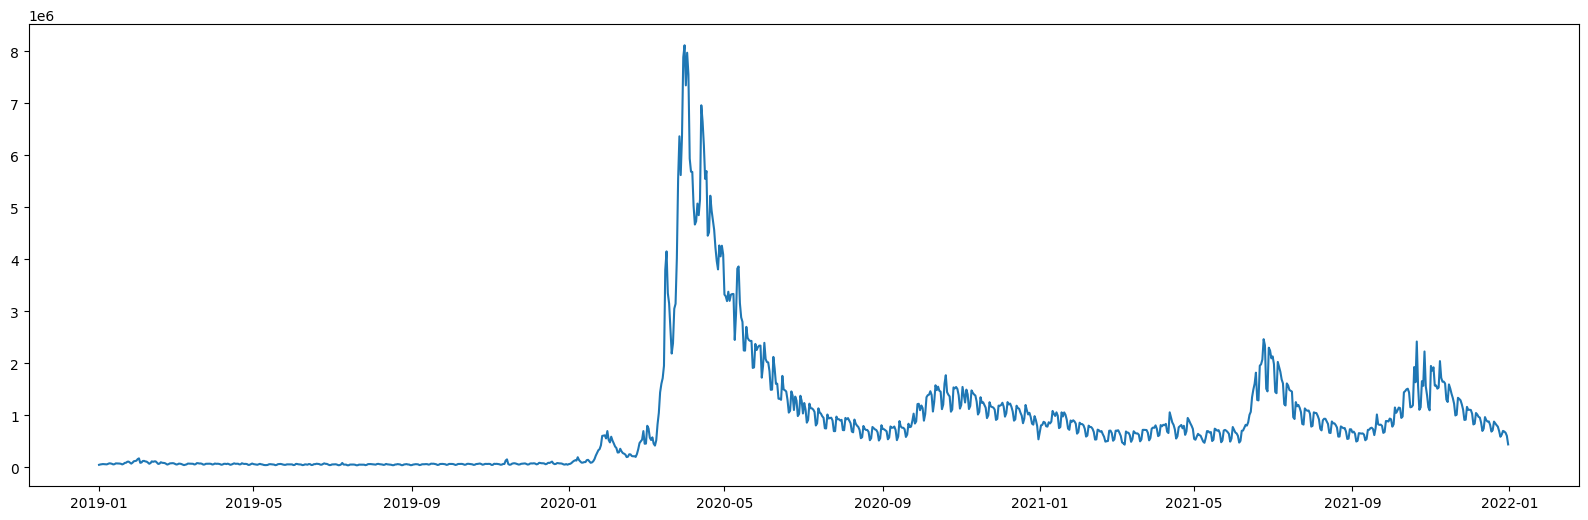

In [8]:
plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер4']);
# Резкое увеличение запросов весной 2020 года - как раз начало пандемении - это коронавирус

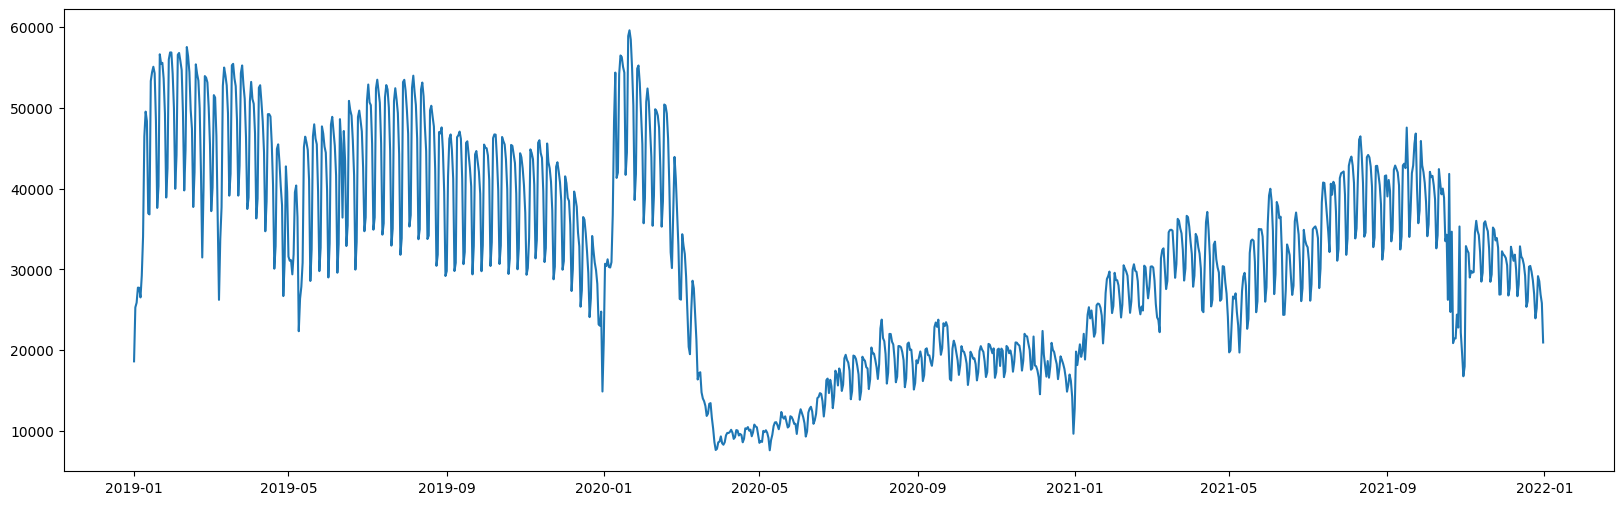

In [9]:
plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер5']);
# Видим спад весной 2020 года из-за ковида. Границы закрыли - нет смысла искать отели за границей.

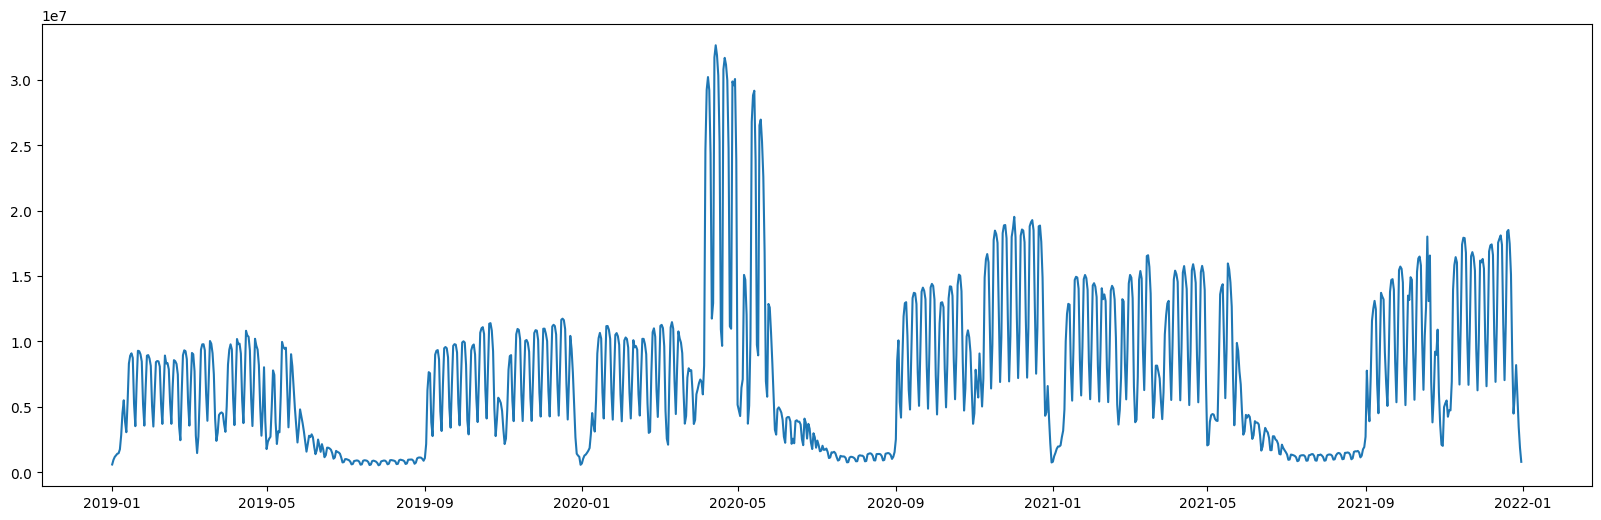

In [10]:
plt.figure(figsize=(20,6))
plt.plot(searches_df['ds'], searches_df['кластер6']);
# Наблюдаем значительный спад летом и на Новый год, резкий рост в сентябре. Собственно видим сезонность, связанную с началом учебного года и каникулами. Это поиск школьных заданий.

* Кластер 1 - спортивные события
* Кластер 2 - подарки и поздравления
* Кластер 3 - музыка
* Кластер 4 - коронавирус
* Кластер 5 - отели за границей
* Кластер 6 - школьные задания

# Задание 2 (4 балла)


## Задача

Вам дана небольшая выборка поисковых запросов, связанных с поиском работм. Запросы разбиты на подкатегории 1, 2, 3, 4, 5, 6, 7 и 8.
Вам нужно сделать подневный прогноз **суммы** поисковых запросов с учётом трендов, сезонности, праздников и аномалий. При этом нужно продемонстрировать качество модели.

Представьте, что сегодня 1 июля 2021 года, и вам нужно спрогнозировать количество запросов до конца 2021 года. 

Прогноз можно строить в Excel, Jupyter Notebook или другими знакомыми инструментами. Главное, чтобы расчёт мог воспроизвести другой человек.

## Данные



Для того, чтобы не только сделать прогноз, но и проверить качество модели, данные разбиты на три файла:

`train.csv` - обучающая выборка с 2017-01-01 по 2020-12-31

`test.csv` - тестовая выборка с 2021-01-01 по 2021-06-30

`val.csv` - валидационная выборка с 2021-07-01 по 2021-12-31. **Для чистоты эксперимента не смотрите его пока что, это данные о будущем, которое хотим предсказать.**

Их назначение будет объяснено позже.

## Оценка качества

Для оценки качества прогнозных моделей проведём эксперимент: скроем от модели часть известных нам данных, построим прогноз, а затем проверим, насколько хорошо он попадает в факт.

Для оценки качества моделей будем использовать метрику [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) по дням: $\text{MAPE} = 100\% \cdot \dfrac{1}{n}\sum_{i=1}^n  \left|\dfrac{факт_i - прогноз_i}{факт_i}\right| $

Например, если нужно рассчитать MAPE за первые 6 месяцев 2021 года (181 день), получим формулу $\text{MAPE} = 100\% \cdot \dfrac{1}{181}\sum_{i=1}^{181}  \left|\dfrac{факт_i - прогноз_i}{факт_i}\right| $


In [11]:
# Пример функции MAPE, которая принимает на вход два списка с значениями
def mape(fact_list, forecast_list):
    errors = []
    
    for f, p in zip(fact_list, forecast_list):
        e = abs((f - p) / f)
        errors.append(e)

    return 100.0 * sum(errors) / len(errors)

mape([1, 2, 3, 4], [0.5, 1.5, 3, 4.5])

21.875

## 2.1. Базовый прогноз (1 балл)
1. Откройте обучающую выборку из файла `train.csv` в Excel или загрузите в pandas DataFrame. Модели должны обучаться только на ней
2. Постройте график временного ряда суммы поисковых запросов
3. Постройте прогноз этого ряда до конца 2021 года любым удобным вам способом (например, взяв код или формулу из лекции) **без** очистки данных, подбора параметров модели, учёта праздников и пр.
4. Прочитайте тестовые данные из файла `test.csv` и посчитайте ошибку прогноза (MAPE) на данных за первое полугодие 2021 года. Назовём это значение ошибки `mape1`

In [12]:
train_df = pd.read_csv('train.csv', parse_dates=['ds'])
train_df.head()

,ds,1,2,3,4,5,6,7,8
0,2017-01-01,8061,10075,20735,8641,3414,39,2343,11229
1,2017-01-02,13243,15663,33827,18966,5900,61,4213,14216
2,2017-01-03,16230,18959,38730,24648,7560,65,5874,17375
3,2017-01-04,18671,21144,42381,29907,9394,69,8042,19965
4,2017-01-05,20471,23040,43880,32436,10076,72,8731,20599


In [13]:
train_df_copy = train_df.copy()
train_y = train_df[['1', '2', '3', '4', '5', '6', '7', '8']].sum(axis=1)
train_df_copy['y'] = train_y
train_df_copy

,ds,1,2,3,4,5,6,7,8,y
0,2017-01-01,8061,10075,20735,8641,3414,39,2343,11229,64537
1,2017-01-02,13243,15663,33827,18966,5900,61,4213,14216,106089
2,2017-01-03,16230,18959,38730,24648,7560,65,5874,17375,129441
3,2017-01-04,18671,21144,42381,29907,9394,69,8042,19965,149573
4,2017-01-05,20471,23040,43880,32436,10076,72,8731,20599,159305
...,...,...,...,...,...,...,...,...,...,...
1456,2020-12-27,41501,42522,30598,32678,17900,65,13253,0,178517
1457,2020-12-28,56983,55679,33479,44723,26128,63,45114,0,262169
1458,2020-12-29,46099,54163,30587,34405,20535,56,42644,0,228489
1459,2020-12-30,31406,38964,22878,19052,13191,46,30156,0,155693


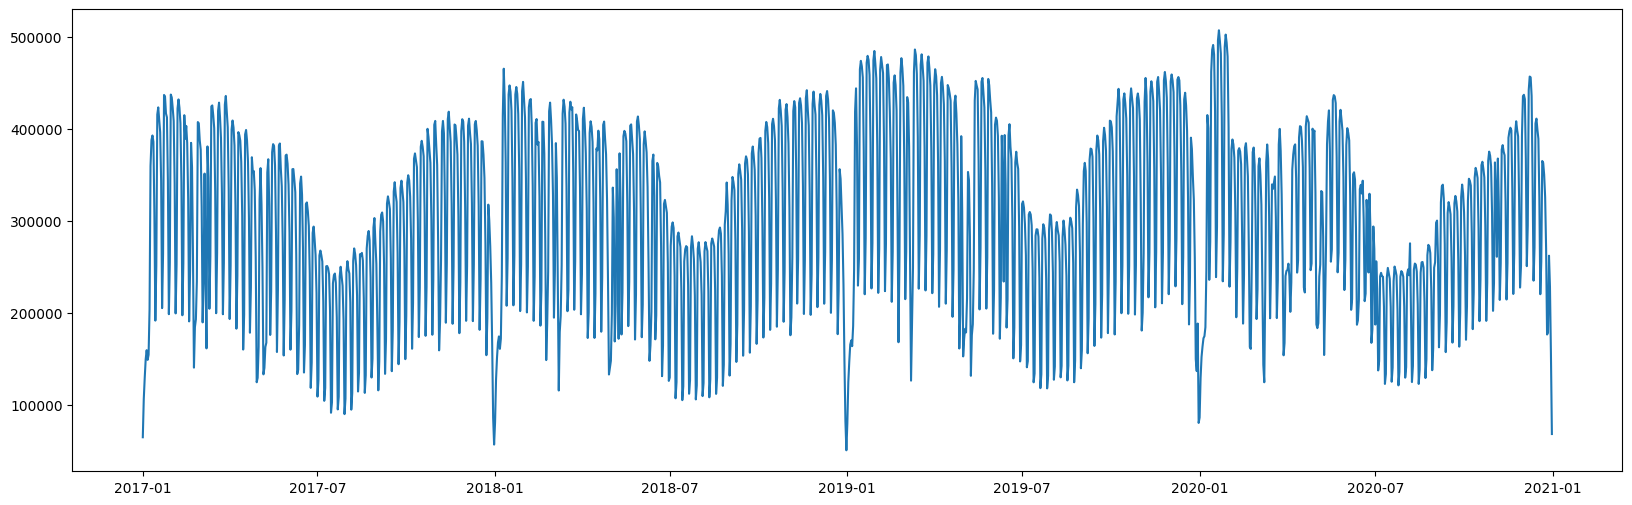

In [14]:
# временной ряд суммы всех поисковых запросов (факт)
train_sum_df = train_df_copy[['ds', 'y']]
# постройте график суммарного временного ряда
plt.figure(figsize=(20,6))
plt.plot(train_sum_df['ds'], train_sum_df['y']);

In [15]:
# постройте прогноз этого суммарного ряда
model = Prophet()
model.fit(train_sum_df)
future_df = model.make_future_dataframe(periods=365)
forecast_df_1 = model.predict(future_df)
forecast_df_1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/iqzliwm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/6vb8dlms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79739', 'data', 'file=/tmp/tmp3db1mvca/iqzliwm5.json', 'init=/tmp/tmp3db1mvca/6vb8dlms.json', 'output', 'file=/tmp/tmp3db1mvca/prophet_modelv1fb5yk7/prophet_model-20230614143820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,277266.855600,35291.105772,152513.588558,277266.855600,277266.855600,-183163.321939,-183163.321939,-183163.321939,-90958.269543,-90958.269543,-90958.269543,-92205.052396,-92205.052396,-92205.052396,0.0,0.0,0.0,94103.533661
1,2017-01-02,277304.505613,184001.753829,295517.079289,277304.505613,277304.505613,-36719.287112,-36719.287112,-36719.287112,53564.629155,53564.629155,53564.629155,-90283.916267,-90283.916267,-90283.916267,0.0,0.0,0.0,240585.218502
2,2017-01-03,277342.155626,201996.069451,310344.409902,277342.155626,277342.155626,-21832.098790,-21832.098790,-21832.098790,65045.239291,65045.239291,65045.239291,-86877.338081,-86877.338081,-86877.338081,0.0,0.0,0.0,255510.056836
3,2017-01-04,277379.805639,199231.678677,305830.416046,277379.805639,277379.805639,-23830.707756,-23830.707756,-23830.707756,58192.391310,58192.391310,58192.391310,-82023.099066,-82023.099066,-82023.099066,0.0,0.0,0.0,253549.097883
4,2017-01-05,277417.455653,191983.847401,311575.039954,277417.455653,277417.455653,-27536.646790,-27536.646790,-27536.646790,48247.583040,48247.583040,48247.583040,-75784.229830,-75784.229830,-75784.229830,0.0,0.0,0.0,249880.808862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,257467.407597,179186.356344,290486.178353,251972.826195,263095.480291,-24934.117039,-24934.117039,-24934.117039,53564.629156,53564.629156,53564.629156,-78498.746194,-78498.746194,-78498.746194,0.0,0.0,0.0,232533.290559
1822,2021-12-28,257394.410648,181754.788024,293680.805959,251876.647258,263040.988003,-18949.428738,-18949.428738,-18949.428738,65045.239291,65045.239291,65045.239291,-83994.668029,-83994.668029,-83994.668029,0.0,0.0,0.0,238444.981910
1823,2021-12-29,257321.413698,173457.870172,285609.745125,251785.512383,263000.815883,-30024.487349,-30024.487349,-30024.487349,58192.391310,58192.391310,58192.391310,-88216.878659,-88216.878659,-88216.878659,0.0,0.0,0.0,227296.926349
1824,2021-12-30,257248.416748,157511.681643,274926.587339,251688.569593,262955.267376,-42827.677181,-42827.677181,-42827.677181,48247.583040,48247.583040,48247.583040,-91075.260221,-91075.260221,-91075.260221,0.0,0.0,0.0,214420.739567


In [16]:
forecast_df_1['yhat'].loc[(forecast_df_1.ds >= '2021-01-01')&(forecast_df_1.ds <= '2021-06-30')]

1461    183851.130758
1462     66987.949294
1463    105764.707936
1464    255068.848700
1465    272715.331121
            ...      
1637     98476.415865
1638    131422.682746
1639    273421.188646
1640    282350.319352
1641    272922.579943
Name: yhat, Length: 181, dtype: float64

In [17]:
test_df = pd.read_csv('test.csv', parse_dates=['ds'])
test_df.head()

,ds,1,2,3,4,5,6,7,8
0,2021-01-01,15721,26737,22323,6795,4608,54,5080,0
1,2021-01-02,22581,42605,33369,14446,7526,77,7141,0
2,2021-01-03,28147,42337,38091,18697,9639,89,8755,0
3,2021-01-04,30981,45813,39446,23713,11766,92,12895,0
4,2021-01-05,33250,45727,41607,25525,12616,96,13744,0


In [18]:
test_df_copy = test_df.copy()
test_y = test_df[['1', '2', '3', '4', '5', '6', '7', '8']].sum(axis=1)
test_df_copy['y'] = test_y
test_df_copy

,ds,1,2,3,4,5,6,7,8,y
0,2021-01-01,15721,26737,22323,6795,4608,54,5080,0,81318
1,2021-01-02,22581,42605,33369,14446,7526,77,7141,0,127745
2,2021-01-03,28147,42337,38091,18697,9639,89,8755,0,145755
3,2021-01-04,30981,45813,39446,23713,11766,92,12895,0,164706
4,2021-01-05,33250,45727,41607,25525,12616,96,13744,0,172565
...,...,...,...,...,...,...,...,...,...,...
176,2021-06-26,36409,37968,24700,18155,12287,64,9478,0,139061
177,2021-06-27,40400,41217,29169,23307,13658,74,9840,0,157665
178,2021-06-28,67619,63378,33986,37025,22886,81,42292,0,267267
179,2021-06-29,68241,64404,35067,35835,22927,79,46228,0,272781


In [19]:
# сумма всех поисков по дням из тестовой выборки
test_sum_df = test_df_copy[['ds', 'y']]

# посчитайте ошибку

mape1 = mape(test_sum_df['y'].tolist(), forecast_df_1['yhat'].loc[(forecast_df_1.ds >= '2021-01-01')&(forecast_df_1.ds <= '2021-06-30')].tolist())
mape1

13.782042914850779

## 2.2. Декомпозиция (1 балл) 

Давайте проверим, получится ли модель точнее, если мы спрогнозируем сначала поиски по категориям, а затем суммируем.

5. Посмотрите категории поисковых запросов и определите, стоит ли все временные ряды прогнозировать независимо, или часть из них стоит сгруппировать в более крупные сущности (например, из 8 временных рядов можно получить 4). Почему?
6. Постройте прогнозы по исходным или сгруппированным временным рядам (так же **без** предобработки данных), посчитайте MAPE для суммы всех поисков. Назовём её `mape2`

Задание считается выполненным, если у вас есть прогноз, есть **минимум 2 группы** запросов и вы **объяснили**, почему объединили данные именно так (если объединяли) или почему не стали объединять.

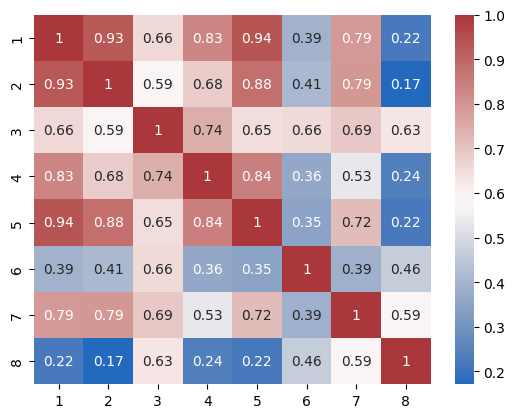

In [20]:
import seaborn as sns

# построим тепловую карту, чтобы понять, какие временные ряды значительно коррелируют между собой и мы можем их объединить
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(train_df.corr("pearson", numeric_only=True), annot=True, cmap=cmap);

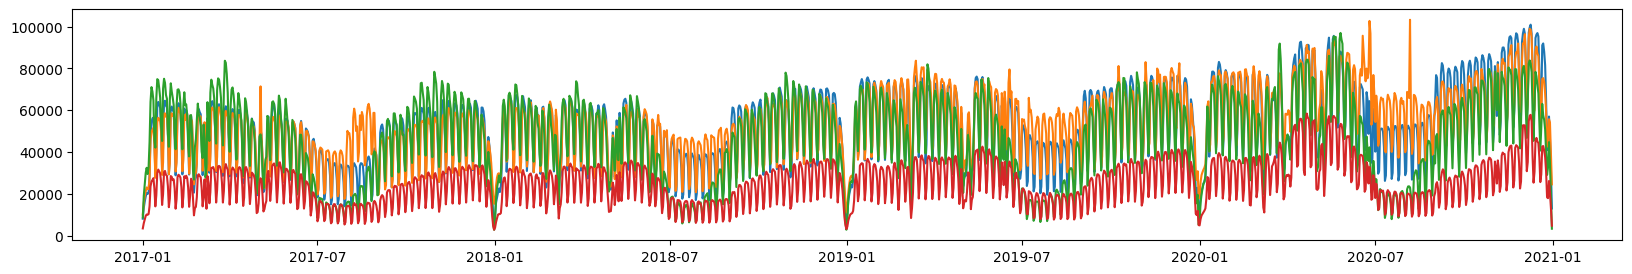

In [21]:
# Мне кажется, важно соблюдать баланс и не объединять слишком много в одну группу
# Считаю, что можно объединить 1, 2, 4, 5 (у них достаточно высокая корреляция между собой), можем также посмотреть на них визуально на одном графике и убедиться в этом:
plt.figure(figsize=(20,3))
plt.plot(train_df['ds'], train_df['1'])
plt.plot(train_df['ds'], train_df['2'])
plt.plot(train_df['ds'], train_df['4'])
plt.plot(train_df['ds'], train_df['5']);
# видим, что в целом у них похожая сезонность

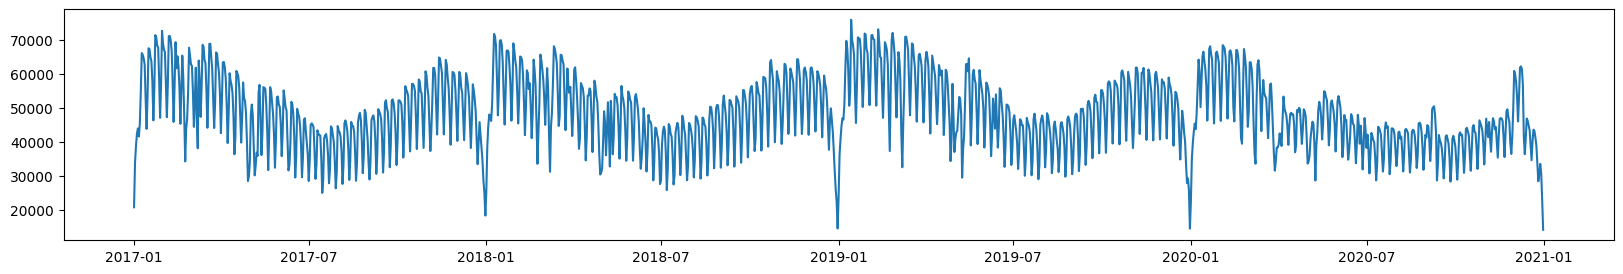

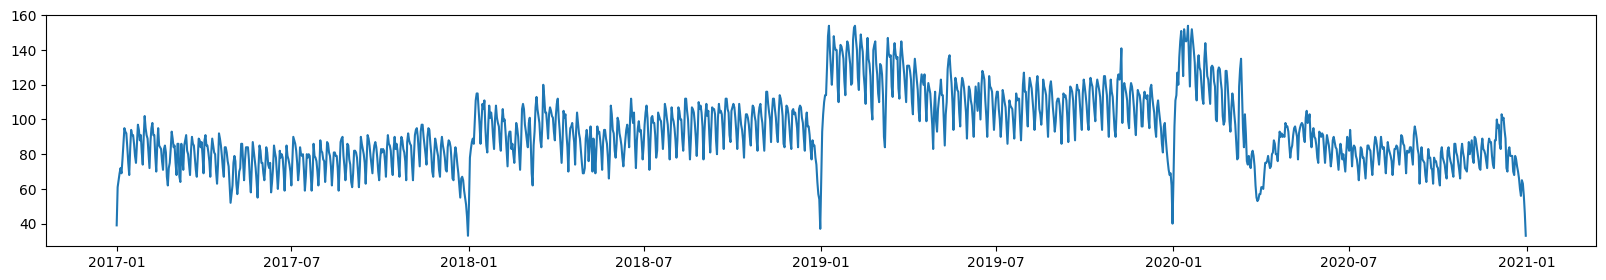

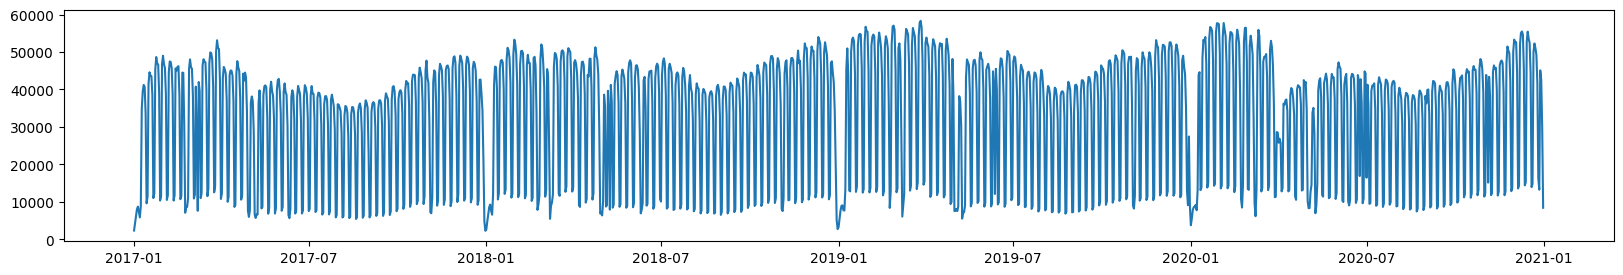

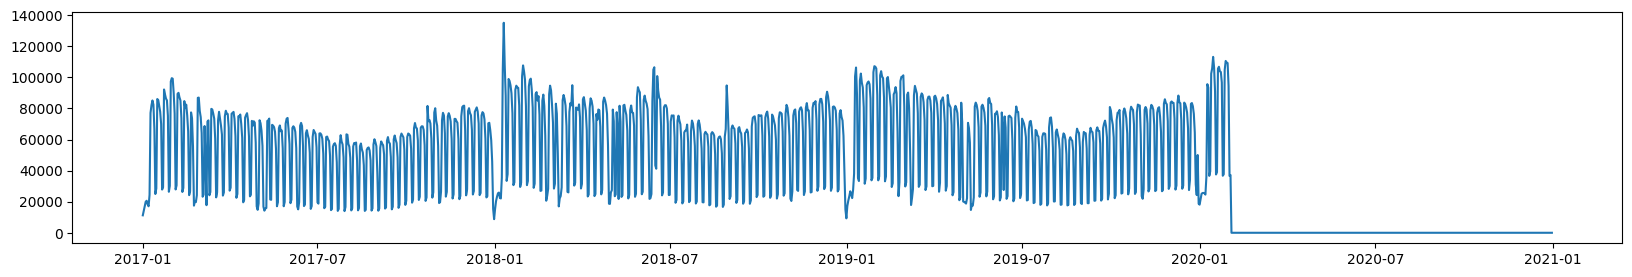

In [22]:
for cat in ['3', '6', '7', '8']:
  plt.figure(figsize=(20,3))
  plt.plot(train_df['ds'], train_df[cat])

# 3 и 6 тоже можем объединить, у них похожий профиль и есть корреляции 0.66

In [23]:
# посмотрев на оставшиеся ряды, решила, что объединю еще 3 и 6 вместе. у них похожий профиль и есть положительная корреляция на тепловой карте. оставшиеся 2 ряда оставила обособленными

group1 = train_df[['1', '2', '4', '5']].sum(axis=1)
group2 = train_df[['3', '6']].sum(axis=1)
new_train_df = train_df[['ds', '7', '8']]
new_train_df['group1'] = group1
new_train_df['group2'] = group2
new_train_df

,ds,7,8,group1,group2
0,2017-01-01,2343,11229,30191,20774
1,2017-01-02,4213,14216,53772,33888
2,2017-01-03,5874,17375,67397,38795
3,2017-01-04,8042,19965,79116,42450
4,2017-01-05,8731,20599,86023,43952
...,...,...,...,...,...
1456,2020-12-27,13253,0,134601,30663
1457,2020-12-28,45114,0,183513,33542
1458,2020-12-29,42644,0,155202,30643
1459,2020-12-30,30156,0,102613,22924


In [24]:
# постройте прогноз по категориям
model = Prophet()
group1_df = train_df[['ds']]
group1_df['y'] = train_df[['1', '2', '4', '5']].sum(axis=1)
model.fit(group1_df)
future_gr1 = model.make_future_dataframe(periods=365)
forecast_gr1 = model.predict(future_gr1)

model = Prophet()
group2_df = train_df[['ds']]
group2_df['y'] = train_df[['3', '6']].sum(axis=1)
model.fit(group2_df)
future_gr2 = model.make_future_dataframe(periods=365)
forecast_gr2 = model.predict(future_gr2)

model = Prophet()
df7 = train_df[['ds']]
df7['y'] = train_df[['7']]
model.fit(df7)
future_7 = model.make_future_dataframe(periods=365)
forecast_7 = model.predict(future_7)

model = Prophet()
df8 = train_df[['ds']]
df8['y'] = train_df[['8']]
model.fit(df8)
future_8 = model.make_future_dataframe(periods=365)
forecast_8 = model.predict(future_8)

forecast_df_2 = forecast_gr1['yhat'] + forecast_gr2['yhat'] + forecast_7['yhat'] + forecast_8['yhat']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/vkvsw6dc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/35cbdamz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73759', 'data', 'file=/tmp/tmp3db1mvca/vkvsw6dc.json', 'init=/tmp/tmp3db1mvca/35cbdamz.json', 'output', 'file=/tmp/tmp3db1mvca/prophet_modelbml_q_mb/prophet_model-20230614143829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3d

In [25]:
ind = forecast_8.loc[(forecast_df_1.ds >= '2021-01-01')&(forecast_df_1.ds <= '2021-06-30')].index # индексы предсказаний первой половины 2021 года

In [26]:
# посчитайте ошибку по данным из test_sum_df

mape2 = mape(test_sum_df['y'].tolist(), forecast_df_2[ind].tolist())

mape2 # немного улучшили качество

13.368852089660153

In [27]:
# Но может мы были не правы, объединяя ряды в группы? Проверим mape.
model = Prophet()
df1 = train_df[['ds']]
df1['y'] = train_df[['1']]
model.fit(df1)
future_1 = model.make_future_dataframe(periods=365)
forecast_1= model.predict(future_1)

model = Prophet()
df2 = train_df[['ds']]
df2['y'] = train_df[['2']]
model.fit(df2)
future_2 = model.make_future_dataframe(periods=365)
forecast_2 = model.predict(future_2)

model = Prophet()
df3 = train_df[['ds']]
df3['y'] = train_df[['3']]
model.fit(df3)
future_3 = model.make_future_dataframe(periods=365)
forecast_3 = model.predict(future_3)

model = Prophet()
df4 = train_df[['ds']]
df4['y'] = train_df[['4']]
model.fit(df4)
future_4 = model.make_future_dataframe(periods=365)
forecast_4 = model.predict(future_4)

model = Prophet()
df5 = train_df[['ds']]
df5['y'] = train_df[['5']]
model.fit(df5)
future_5 = model.make_future_dataframe(periods=365)
forecast_5 = model.predict(future_5)

model = Prophet()
df6 = train_df[['ds']]
df6['y'] = train_df[['6']]
model.fit(df5)
future_6 = model.make_future_dataframe(periods=365)
forecast_6 = model.predict(future_6)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/qm9uj21i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/t8i9p2pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2802', 'data', 'file=/tmp/tmp3db1mvca/qm9uj21i.json', 'init=/tmp/tmp3db1mvca/t8i9p2pw.json', 'output', 'file=/tmp/tmp3db1mvca/prophet_modellpkk4odq/prophet_model-20230614143836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db

In [28]:
forecast_df_2_1 = forecast_1['yhat'] + forecast_2['yhat'] + forecast_3['yhat'] + forecast_4['yhat'] + forecast_5['yhat'] + forecast_6['yhat'] + forecast_7['yhat'] + forecast_8['yhat']
mape2_1 = mape(test_sum_df['y'].tolist(), forecast_df_2_1[ind].tolist())
mape2_1
# мы были правы, решив объединять ряды в группы)

15.49219356224204

## 2.3. Улучшение модели (1 балл)

7. Для каждой группы из предыдущего задания постройте графики с фактом (train + test) и прогнозом, визуально оцените качество прогноза 
8. Найдите недостатки, очистите временные ряды от аномалий или обновите параметры модели. Учтите праздники, если позволяет модель. Увеличить точность может использование не-статистического метода для какого-либо из рядов
9. Сделайте прогноз и замерьте качество на суммарных поисках, назовите ошибку `mape3`

Задание считается выполненным, если вы получили `mape3 < mape2` и `mape3 < mape1`, а прогноз №3 на весь 2021 год выглядит визуально адекватным

In [29]:
# чтобы сравнить каждую группу с тестовой выборкой, нужно так же сгруппировать данные в ней
# факт для графиков
train_and_test_df = pd.concat([test_df, train_df])

In [30]:
train_and_test_df = pd.concat([test_df, train_df])
train_and_test_df = train_and_test_df.sort_values(by='ds')
train_and_test_df

,ds,1,2,3,4,5,6,7,8
0,2017-01-01,8061,10075,20735,8641,3414,39,2343,11229
1,2017-01-02,13243,15663,33827,18966,5900,61,4213,14216
2,2017-01-03,16230,18959,38730,24648,7560,65,5874,17375
3,2017-01-04,18671,21144,42381,29907,9394,69,8042,19965
4,2017-01-05,20471,23040,43880,32436,10076,72,8731,20599
...,...,...,...,...,...,...,...,...,...
176,2021-06-26,36409,37968,24700,18155,12287,64,9478,0
177,2021-06-27,40400,41217,29169,23307,13658,74,9840,0
178,2021-06-28,67619,63378,33986,37025,22886,81,42292,0
179,2021-06-29,68241,64404,35067,35835,22927,79,46228,0


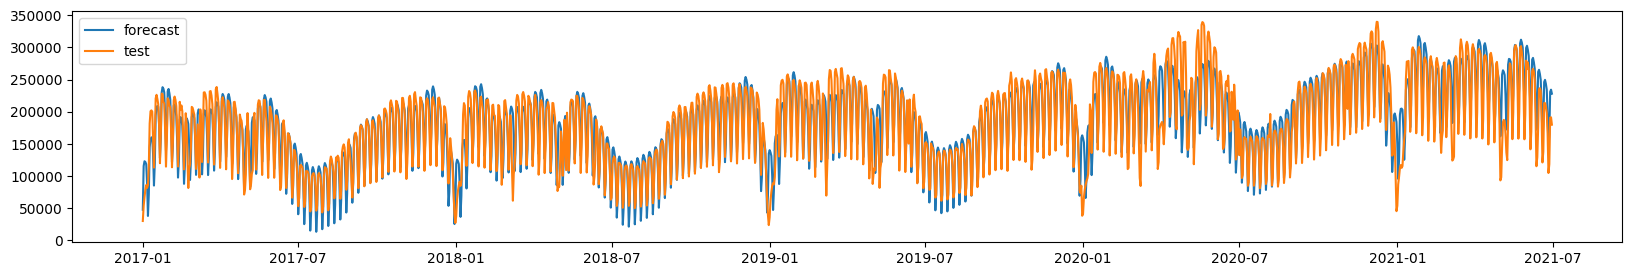

In [31]:
train_and_test_df['gr1'] = train_and_test_df[['1', '2', '4', '5']].sum(axis=1)
plt.figure(figsize=(20,3))
plt.plot(forecast_gr1['ds'].loc[(forecast_gr1.ds <= '2021-06-30')], forecast_gr1['yhat'].loc[(forecast_gr1.ds <= '2021-06-30')], label='forecast')
plt.plot(train_and_test_df['ds'], train_and_test_df['gr1'], label='test')
plt.legend();

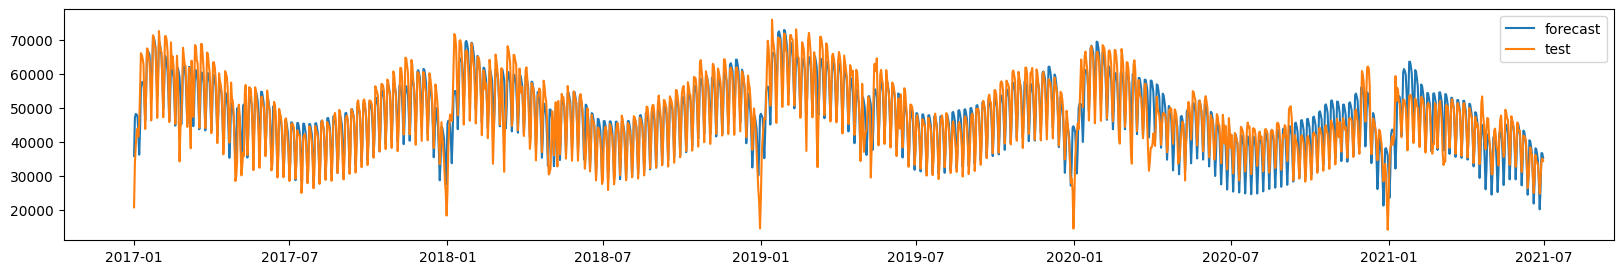

In [32]:
train_and_test_df['gr2'] = train_and_test_df[['3', '6']].sum(axis=1)
plt.figure(figsize=(20,3))
plt.plot(forecast_gr2['ds'].loc[(forecast_gr2.ds <= '2021-06-30')], forecast_gr2['yhat'].loc[(forecast_gr2.ds <= '2021-06-30')], label='forecast')
plt.plot(train_and_test_df['ds'], train_and_test_df['gr2'], label='test')
plt.legend();

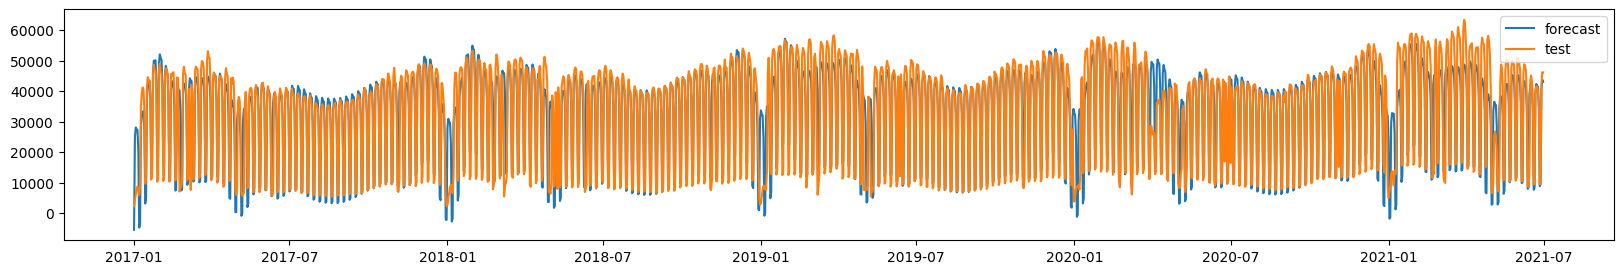

In [33]:
plt.figure(figsize=(20,3))
plt.plot(forecast_7['ds'].loc[(forecast_7.ds <= '2021-06-30')], forecast_7['yhat'].loc[(forecast_7.ds <= '2021-06-30')], label='forecast')
plt.plot(train_and_test_df['ds'], train_and_test_df['7'], label='test')
plt.legend();

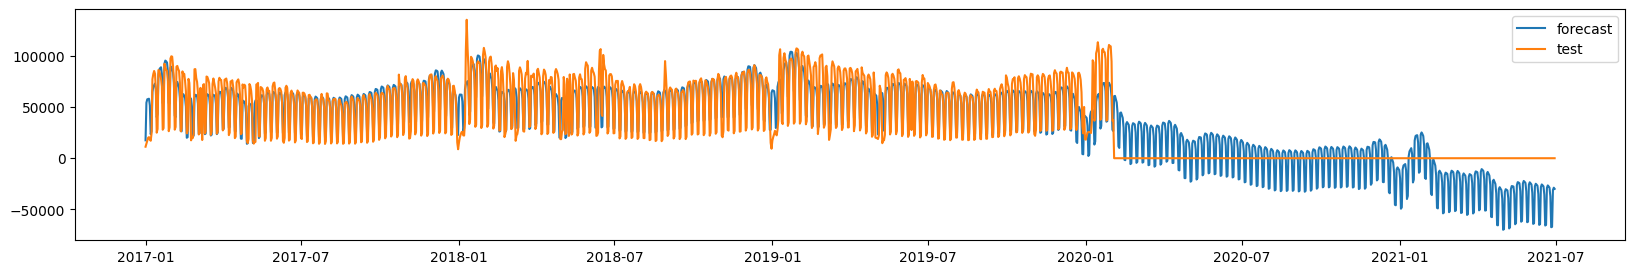

In [34]:
plt.figure(figsize=(20,3))
plt.plot(forecast_8['ds'].loc[(forecast_8.ds <= '2021-06-30')], forecast_8['yhat'].loc[(forecast_8.ds <= '2021-06-30')], label='forecast')
plt.plot(train_and_test_df['ds'], train_and_test_df['8'], label='test')
plt.legend();
# признак становится нулевым еще на трейне, наверное, имеет смысл занулить его и в предсказании с определенной даты

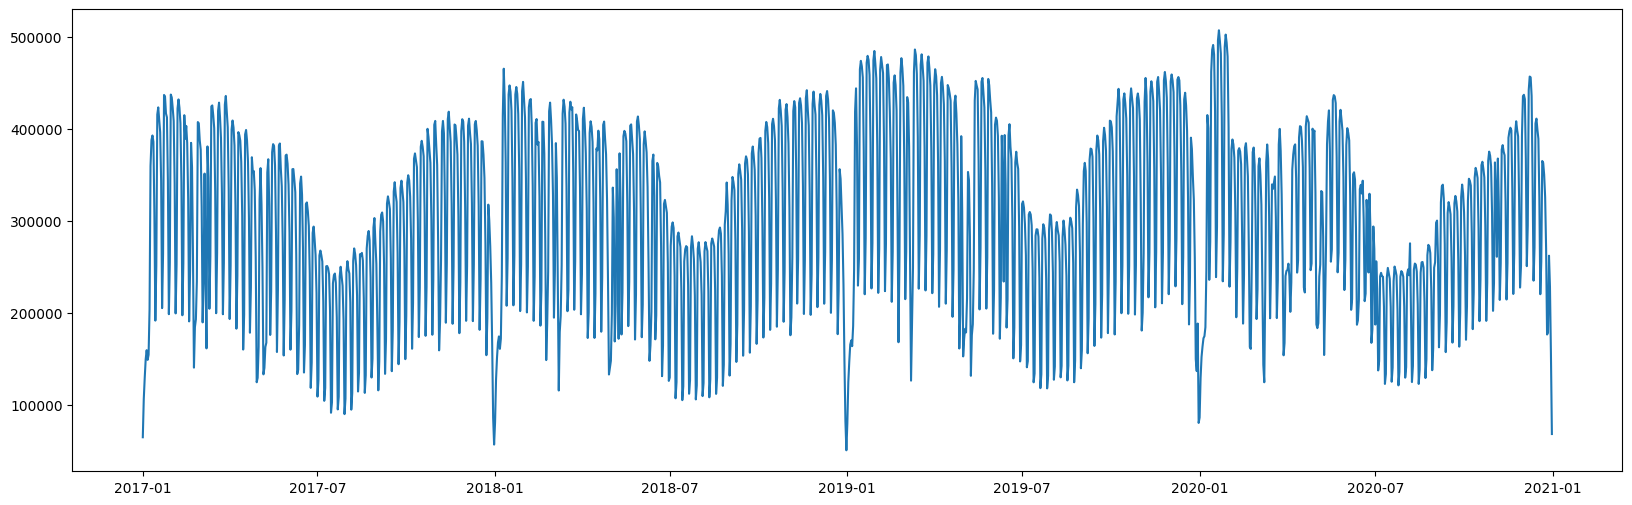

In [35]:
plt.figure(figsize=(20,6))
plt.plot(train_sum_df['ds'], train_sum_df['y']);

In [36]:
# на графике трейна видим несколько неадкватное поведение ряда в первой половине 2020 года (начало локдауна)
# отметим это как праздники
# взяла код из документации Prophet
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'}
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77


In [37]:
# постройте прогноз по очищенным категориям запросов
# добавила для каждой группы российские праздники, локдаун со своим prior scale, yearly_seasonality
# решила не удалять никакие выбросы, потому что, по-моему они все приходятся как раз на празники и ковид
import numpy as np

model = Prophet(holidays=lockdowns, holidays_prior_scale=5, yearly_seasonality=20)
model.add_country_holidays(country_name='RU')
group1_df = train_df[['ds']]
group1_df['y'] = train_df[['1', '2', '4', '5']].sum(axis=1)
model.fit(group1_df)
future_gr1 = model.make_future_dataframe(periods=365)
forecast_gr1 = model.predict(future_gr1)

model = Prophet(holidays=lockdowns, holidays_prior_scale=2)
model.add_country_holidays(country_name='RU')
group2_df = train_df[['ds']]
group2_df['y'] = train_df[['3', '6']].sum(axis=1)
model.fit(group2_df)
future_gr2 = model.make_future_dataframe(periods=365)
forecast_gr2 = model.predict(future_gr2)

model = Prophet(holidays_prior_scale=5)
model.add_country_holidays(country_name='RU')
df7 = train_df[['ds']]
df7['y'] = train_df[['7']]
model.fit(df7)
future_7 = model.make_future_dataframe(periods=365)
forecast_7 = model.predict(future_7)

# Предсказываем до тех пор, пока это значение не будет 0. Потом - константный прогноз
model = Prophet(holidays_prior_scale=2)
model.add_country_holidays(country_name='RU')
df8 = train_df[['ds']]
df8['y'] = train_df[['8']]
model.fit(df8)
future_8 = model.make_future_dataframe(periods=365)
forecast_8 = model.predict(future_8)
forecast_8['yhat'].loc[forecast_8.ds>='2020-02-03'] = np.zeros_like(forecast_8['yhat'].loc[forecast_8.ds>='2020-02-03'])
forecast_df_3 = forecast_gr1['yhat'] + forecast_gr2['yhat'] + forecast_7['yhat'] + forecast_8['yhat'] 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/61s6nzsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db1mvca/08e24i1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7196', 'data', 'file=/tmp/tmp3db1mvca/61s6nzsg.json', 'init=/tmp/tmp3db1mvca/08e24i1c.json', 'output', 'file=/tmp/tmp3db1mvca/prophet_modelhpkd6js1/prophet_model-20230614143851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3db

In [38]:
# посчитайте ошибку по данным из test_sum_df
mape3 = mape(test_sum_df['y'].tolist(), forecast_df_3[ind].tolist())
mape3


11.742606625559002

In [39]:
# прогноз №3 на весь 2021 год на последнем графике в задании ниже

## 2.4 Валидация модели (1 балл)

Вы обучали модель на обучающей выборке (train) и корректировали модель, основываясь на ошибке на тестовой выборке (test). Если при этом не оценивать прогноз визуально, модель может "[переобучиться](https://neerc.ifmo.ru/wiki/index.php?title=Переобучение)". В этом случае она будет хорошо предсказывать первое полугодие 2021, а другие периоды - плохо.

Давайте проверим, смогла ли модель понять общие зависимости в данных или переобучилась. Для этого нужно посчитать ошибку на `val.csv` (2021-06-01 - 2021-12-31) для всех моделей.

Задание считается выполненным, если корректно посчитана ошибка на валидационной выборке и построен итоговый график с фактом и прогнозами.

In [40]:
val_df = pd.read_csv('val.csv', parse_dates=['ds'])
val_df.head()

,ds,1,2,3,4,5,6,7,8
0,2021-07-01,62766,58049,31976,27163,18777,79,42951,0
1,2021-07-02,54381,53112,28523,21717,17004,69,35499,0
2,2021-07-03,34160,36569,24154,11258,9027,67,9524,0
3,2021-07-04,36378,38771,28183,13988,9564,79,10200,0
4,2021-07-05,58207,59820,33812,22573,17787,86,40220,0


In [41]:
# сумма всех рядов
val_sum_df = val_df[['1', '2', '3', '4', '5', '6', '7', '8']].sum(axis=1)

In [42]:
ind2 = forecast_8.loc[(forecast_df_1.ds >= '2021-07-01')].index # индексы второго полугодия 2021 года

In [43]:
# посчитайте ошибку на второе полугодие 2021 года для всех прогнозов

val_error_1 = mape(val_sum_df.tolist(), forecast_df_1['yhat'][ind2].tolist()) # изначальный прогноз суммы
val_error_2 = mape(val_sum_df.tolist(), forecast_df_2[ind2].tolist()) # прогноз, разбитый на подкатегории
val_error_3 = mape(val_sum_df.tolist(), forecast_df_3[ind2].tolist()) # прогноз, разбитый на подкатегории и очищенный от аномалий

In [44]:
val_error_1, val_error_2, val_error_3

(20.06231920549045, 19.192056264886208, 14.9362685083202)

In [45]:
# вспомним mape на тесте и увидим, что значения на валидации, конечно, выросли, но не драматично
mape1, mape2, mape3

(13.782042914850779, 13.368852089660153, 11.742606625559002)

Обычно ошибка на валидационной выборке больше, чем на тестовой, это нормально. Однако, если она **гораздо** (например, в разы) больше ошибки на тестовой выборке, модель переобучилась.

Если ошибка получилась большой, это не критично: у нас не было цели создать идеальный прогноз. Основными критериями при оценивании домашнего задания будут методологически верный подход к построению и визуальная адекватность полученного прогноза

In [46]:
# постройте при приложите график суммы поисков с фактом (train + test + val) и всеми прогнозами
train_and_test_df = train_and_test_df.drop(['gr1', 'gr2'], axis=1)
train_and_test_and_val_df = pd.concat([train_and_test_df, val_df])
train_and_test_and_val_df = train_and_test_and_val_df.sort_values(by='ds')
train_and_test_and_val_df['sum'] = train_and_test_and_val_df[['1', '2', '3', '4', '5', '6', '7', '8']].sum(axis=1)
train_and_test_and_val_df

,ds,1,2,3,4,5,6,7,8,sum
0,2017-01-01,8061,10075,20735,8641,3414,39,2343,11229,64537
1,2017-01-02,13243,15663,33827,18966,5900,61,4213,14216,106089
2,2017-01-03,16230,18959,38730,24648,7560,65,5874,17375,129441
3,2017-01-04,18671,21144,42381,29907,9394,69,8042,19965,149573
4,2017-01-05,20471,23040,43880,32436,10076,72,8731,20599,159305
...,...,...,...,...,...,...,...,...,...,...
179,2021-12-27,71211,83480,35910,53899,32837,79,48891,0,326307
180,2021-12-28,61629,76282,34431,44248,27953,81,48371,0,292995
181,2021-12-29,49491,69448,30418,31721,21467,74,41382,0,244001
182,2021-12-30,32776,61484,24740,17888,13626,61,27613,0,178188


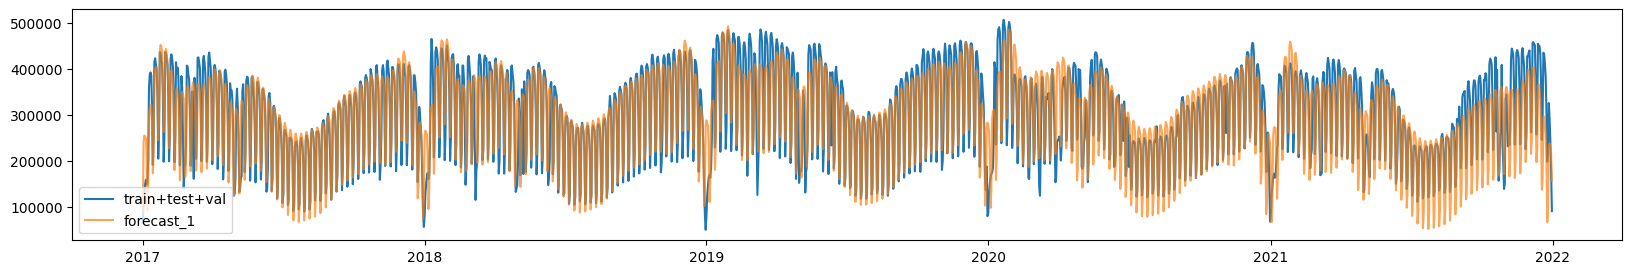

In [47]:
plt.figure(figsize=(20,3))
plt.plot(train_and_test_and_val_df['ds'], train_and_test_and_val_df['sum'], label='train+test+val')
plt.plot(forecast_df_1['ds'], forecast_df_1['yhat'], label='forecast_1', alpha=0.7)
plt.legend();

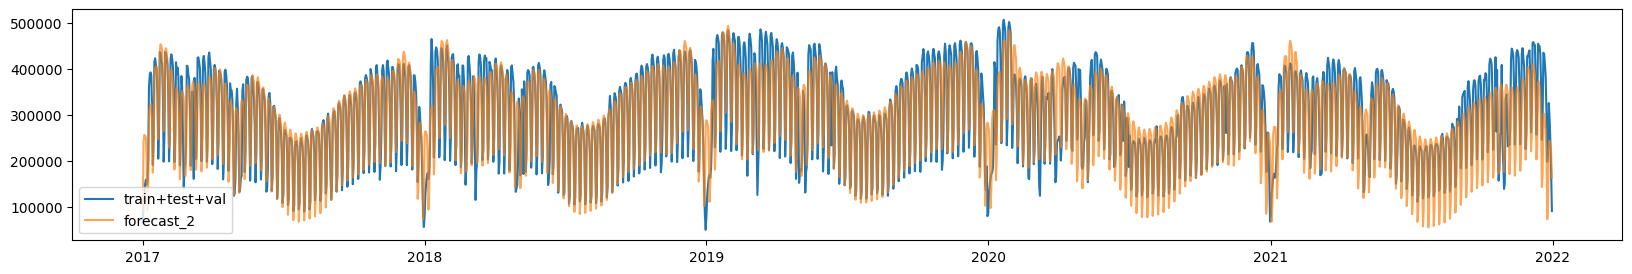

In [48]:
plt.figure(figsize=(20,3))
plt.plot(train_and_test_and_val_df['ds'], train_and_test_and_val_df['sum'], label='train+test+val')
plt.plot(forecast_df_1['ds'], forecast_df_2, label='forecast_2', alpha=0.7)
plt.legend();

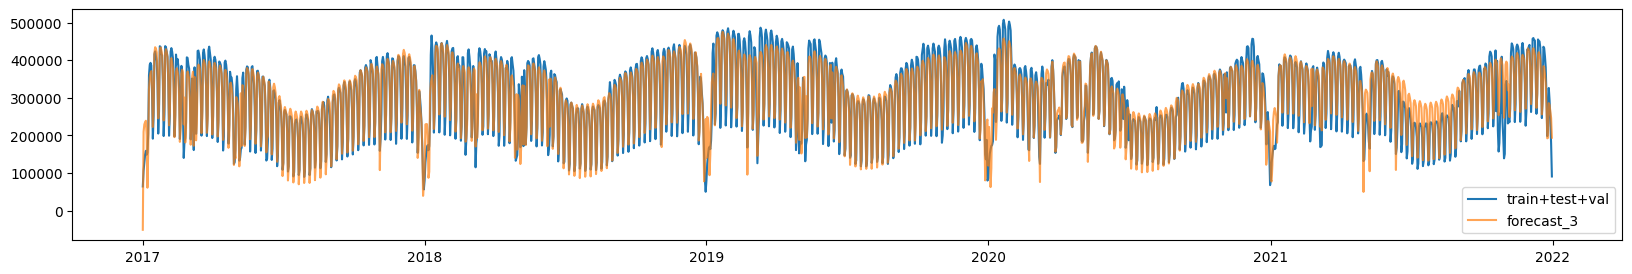

In [49]:
plt.figure(figsize=(20,3))
plt.plot(train_and_test_and_val_df['ds'], train_and_test_and_val_df['sum'], label='train+test+val')
plt.plot(forecast_df_1['ds'], forecast_df_3, label='forecast_3', alpha=0.7)
plt.legend();